## PROJET :  A/B Testing 
<h3 style="color:black;text-align:center;padding: 2% 20% ">STEVE DIFFO</h3>


## Problématiques Marketing : Quelle version d’une landing page convertit le mieux les utilisateurs ?


## Table des matieres
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#preparationDonnees">Préparation des Données</a></li>
<li><a href="#Taux">Calculer les Taux de Conversion</a></li>
<li><a href="#Tests">Tests statistiques</a></li>
<li><a href="#Statistique">Analyse statistique des résultats</a></li>
<li><a href="#Decision">Visualisation des résultats pour la prise de décision</a></li>
      
<li><a href="#conclusion">Conclusion</a></li>
</ul>


<a id='intro'></a>
## INTRODUCTION

> Ce rapport permet d'identifier quelle version d'une landing page convertit le mieux les utilisateurs, Nous allons  suivre une méthode systématique appelée A/B Testing.Pour ce travail nous allons utiliser un ensemble de données provenant de Kaggle . le lien vers notre ensemble de données ce trouve sur L'URL : https://www.kaggle.com/datasets/zhangluyuan/ab-testing



>L'objectif principal est : ** d'identifer la page web qui convertit lle mieux les utilisateurs

In [1]:
# importation des bibliotheques 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
%matplotlib inline

<a id="preparationDonnees"></a>
# Preparation des données 



> Dans cette partie nous allons charger les donnees les explorer et nettoyer

In [2]:
# chargement des données
df= pd.read_csv('ab_data.csv')
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [3]:
# taille des données 
print(df.shape)
# les informations de mon dataset
print(df.info())

(294478, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


In [4]:
#vérification des valeurs nulles et dupliquées
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [10]:
# Vérifier la répartition des groupes et des pages de destination
print(df['group'].value_counts())
print(df['landing_page'].value_counts())

# S'assurer que chaque utilisateur est associé au bon groupe et à la bonne page de destination
mismatched = df[(df['group'] == 'control') & (df['landing_page'] != 'old_page') |
                (df['group'] == 'treatment') & (df['landing_page'] != 'new_page')]
print(f"Nombre d'anomalies : {mismatched.shape[0]}")

group
treatment    147276
control      147202
Name: count, dtype: int64
landing_page
old_page    147239
new_page    147239
Name: count, dtype: int64
Nombre d'anomalies : 3893


In [11]:
# Créer un nouveau DataFrame sans les anomalies
df_clean = df.drop(mismatched.index)

# Vérifier la répartition des groupes et des pages de destination dans le DataFrame nettoyé
print(df_clean['group'].value_counts())
print(df_clean['landing_page'].value_counts())

# Vérifier que les anomalies ont bien été exclues
mismatched_clean = df_clean[(df_clean['group'] == 'control') & (df_clean['landing_page'] != 'old_page') |
                            (df_clean['group'] == 'treatment') & (df_clean['landing_page'] != 'new_page')]
print(f"Nombre d'anomalies après exclusion : {mismatched_clean.shape[0]}")

group
treatment    145311
control      145274
Name: count, dtype: int64
landing_page
new_page    145311
old_page    145274
Name: count, dtype: int64
Nombre d'anomalies après exclusion : 0


<a id='Taux'></a>
# Calculer les Taux de Conversion

>afficharge des utilisateurs convertir et non 


In [16]:
uti_convertir = df_clean[df_clean['converted']==1]
uti_convertir
# taille des utilisateurs convertir 
print('taille utilisateurs convertir',uti_convertir.shape)
print('taille finale des data',df_clean.shape)
uti_convertir

taille utilisateurs convertir (34753, 5)
taille finale des data (290585, 5)


,user_id,timestamp,group,landing_page,converted
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
15,644214,2017-01-22 02:05:21.719434,control,old_page,1
...,...,...,...,...,...
294396,838593,2017-01-15 09:56:31.455023,treatment,new_page,1
294405,712217,2017-01-11 10:34:30.176801,control,old_page,1
294420,795742,2017-01-09 01:06:58.299207,control,old_page,1
294430,733871,2017-01-21 17:54:08.810964,treatment,new_page,1


In [17]:
# Calculer les taux de conversion pour chaque groupe
conversion_rates = df_clean.groupby('group')['converted'].mean()
print(conversion_rates)

# Nombre de conversions et de visites pour chaque groupe
conversions = df_clean.groupby('group')['converted'].sum()
visitors = df_clean.groupby('group')['converted'].count()
print(conversions)
print(visitors)


group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64
group
control      17489
treatment    17264
Name: converted, dtype: int64
group
control      145274
treatment    145311
Name: converted, dtype: int64


<a id='Tests'></a>
# Test statistique

## Le test Z pour proportions est utilisé en A/B testing pour vérifier si la différence entre deux taux est significative ou non.

In [18]:
from statsmodels.stats.proportion import proportions_ztest

# Données pour le test
converted = df_clean[df_clean['converted'] == 1].groupby('group')['user_id'].count()
visitors = df_clean.groupby('group')['user_id'].count()

# Test de proportion z
stat, p_value = proportions_ztest(converted, visitors)
print(f'Statistique de test : {stat}')
print(f'Valeur p : {p_value}')

# Interprétation des résultats
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Il y a une différence significative entre les deux versions de la landing page.")
else:
    print("Il n'y a pas de différence significative entre les deux versions de la landing page.")


Statistique de test : 1.3116075339133115
Valeur p : 0.18965258971881804
Il n'y a pas de différence significative entre les deux versions de la landing page.


<a id="Statistique"></a>
## Analyse statistique des résultats

> Nous constatons que nous avons  un test statistique de 1.31 une P valeur de 0.18 qui est supérieure au niveau de significativité  0.05 donc il y'a pas de différence signification entre les deux versions de la landing page 

<a id="Decision"></a>
## Visualisation des résultats pour la prise de décision

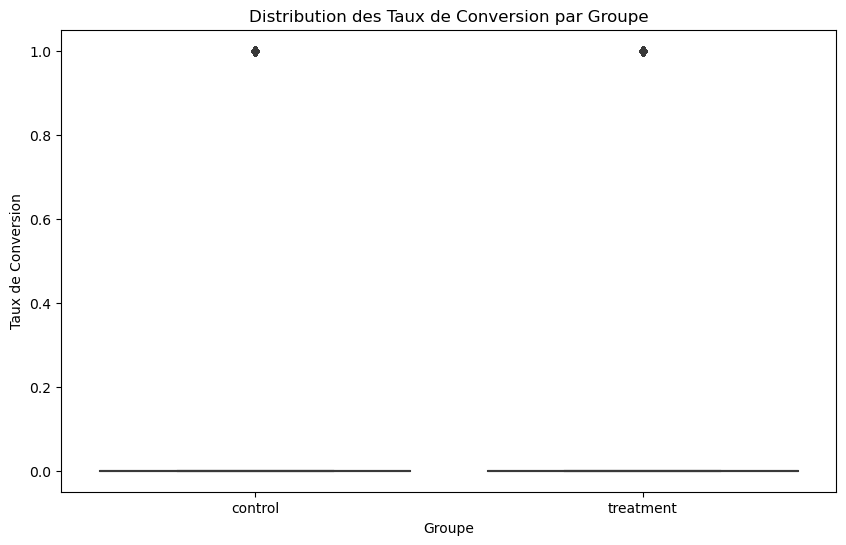

In [19]:

# Créer un boxplot pour visualiser la distribution des taux de conversion par groupe
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='converted', data=df_clean, palette='viridis')
plt.title('Distribution des Taux de Conversion par Groupe')
plt.xlabel('Groupe')
plt.ylabel('Taux de Conversion')
plt.show()


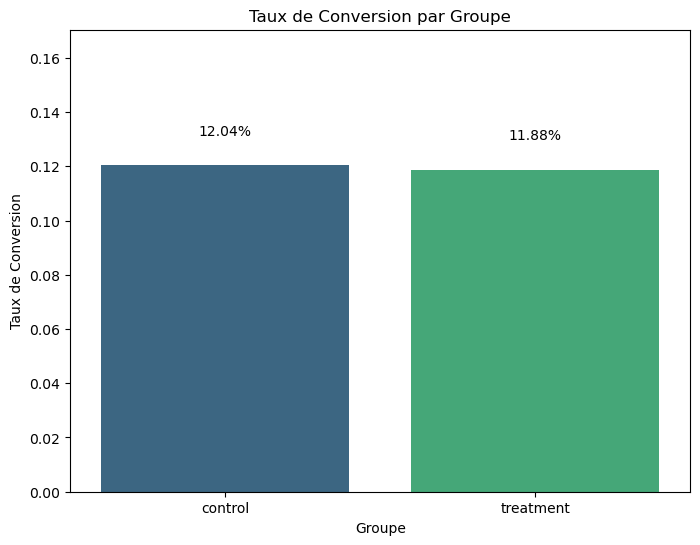

In [20]:

# Visualiser les taux de conversion par groupe
plt.figure(figsize=(8, 6))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette='viridis')
plt.title('Taux de Conversion par Groupe')
plt.xlabel('Groupe')
plt.ylabel('Taux de Conversion')
plt.ylim(0, max(conversion_rates) + 0.05)

# Afficher les valeurs sur les barres
for i, v in enumerate(conversion_rates.values):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom')

plt.show()


> Nous Constatons que nous n'avons pas de difference significative entre les deux pages Web

<a id="conclusion"></a>


## CONCLUSION

### Résumé
Nous avons effectué un A/B testing pour comparer les taux de conversion de deux versions de notre landing page. Les résultats de tests et de visualisations indiquent qu'il n'y a pas de différence significative entre les deux versions.

### Détails des Résultats
- **Statistique de test** :  1.3116075339133115
- **Valeur p** : 0.18965258971881804

- **Conclusion** : Aucune différence statistiquement significative n'a été trouvée entre les deux versions de la landing page.

### Actions Recommandées
1. Continuer les tests avec un échantillon plus large.
2. Explorer de nouvelles hypothèses de modification.
3. Optimiser continuellement la landing page en fonction des insights obtenus.

### Prochaines Étapes
1. Examiner les métriques supplémentaires.
2. Planifier et exécuter des tests A/B supplémentaires.
3. Réaliser des réunions de brainstorming pour générer de nouvelles idées de variations.
4. Implémenter les changements progressifs et suivre les performances.


